In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

warnings.filterwarnings('ignore')



🚀 STARTING COMPREHENSIVE STOCK ANALYSIS
=== LOADING AND CLEANING DATA ===
Dataset shape: (497472, 7)
Columns: ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']
Date range: 2014-01-02 to 2017-12-29
Number of unique stocks: 505

Rows after cleaning: 497461
Missing values after cleaning:
symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Selected stocks for analysis: ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'NVDA']

=== STOCK PERFORMANCE ANALYSIS ===

📊 PERFORMANCE METRICS SUMMARY:
       total_return  annualized_return  volatility  sharpe_ratio  \
AAPL       114.1650            20.9955     22.7147        0.8656   
GOOGL       89.0807            17.2818     21.9449        0.7444   
MSFT       130.1938            23.2007     21.7396        0.9772   
AMZN       193.8588            30.9637     29.5992        0.9918   
NVDA      1120.0504            87.0097     37.6843        1.7927   

       sortino_ratio  max_drawdown   var_5  max_price  m

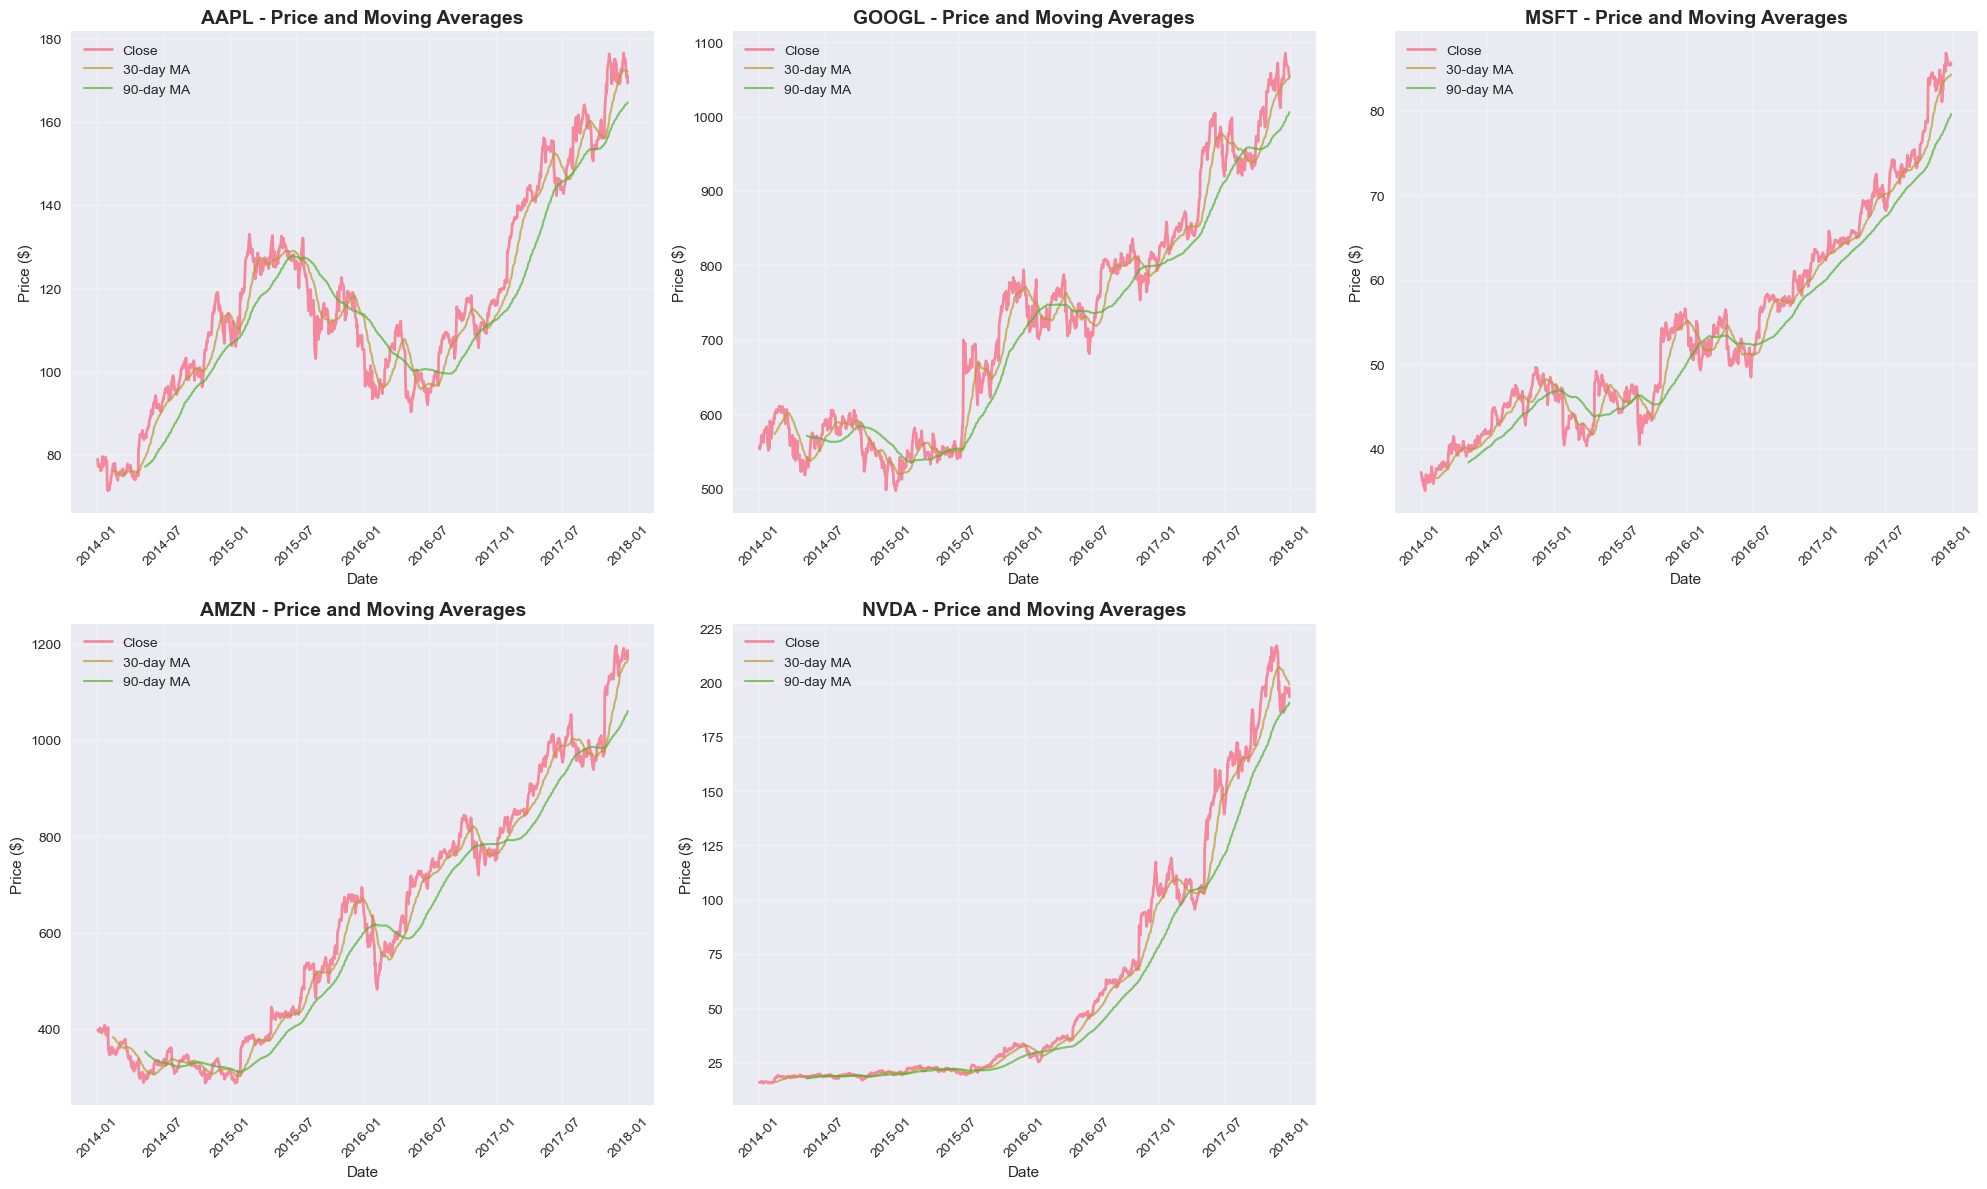


=== RETURNS AND VOLATILITY ANALYSIS ===


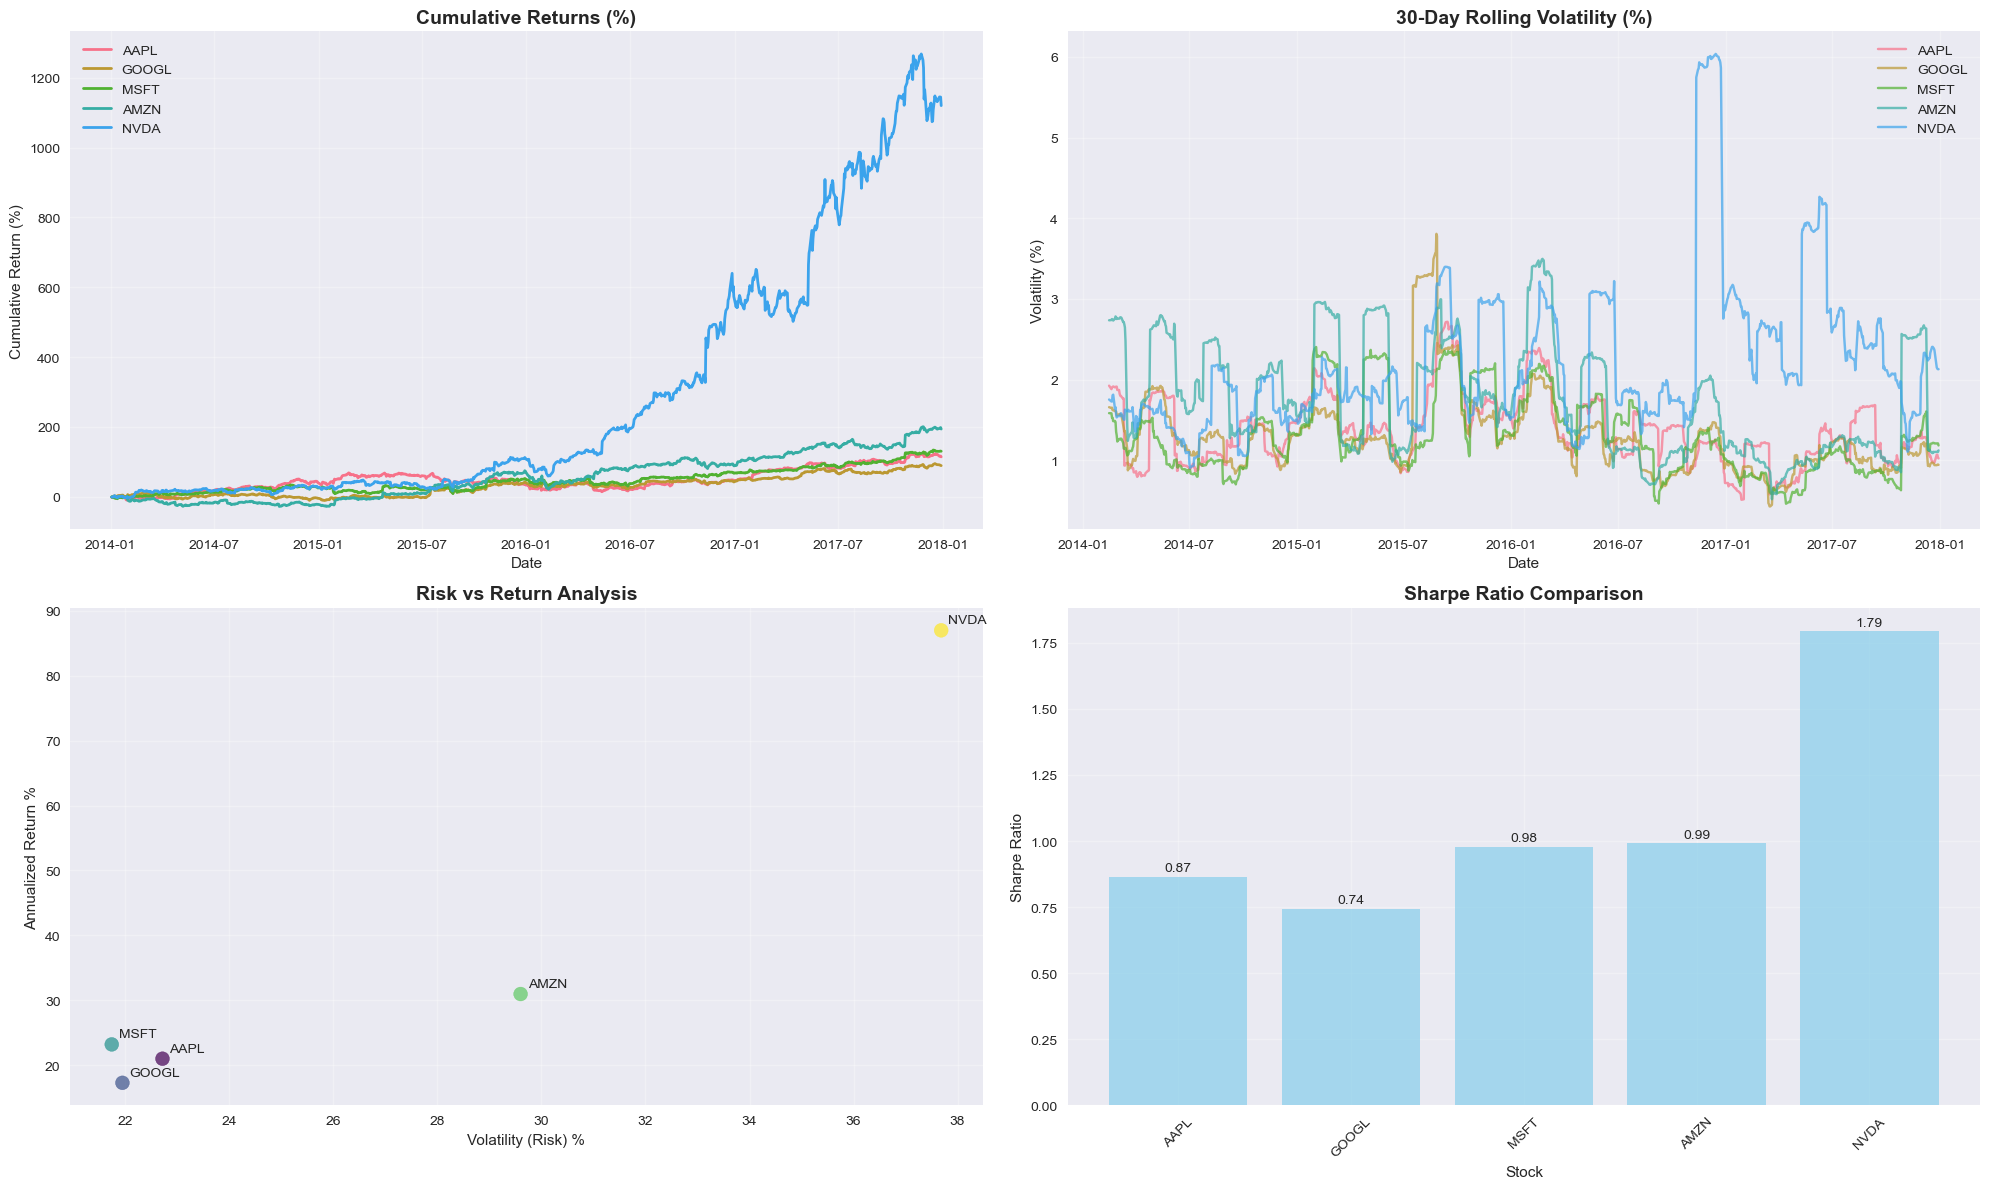


=== CORRELATION ANALYSIS ===


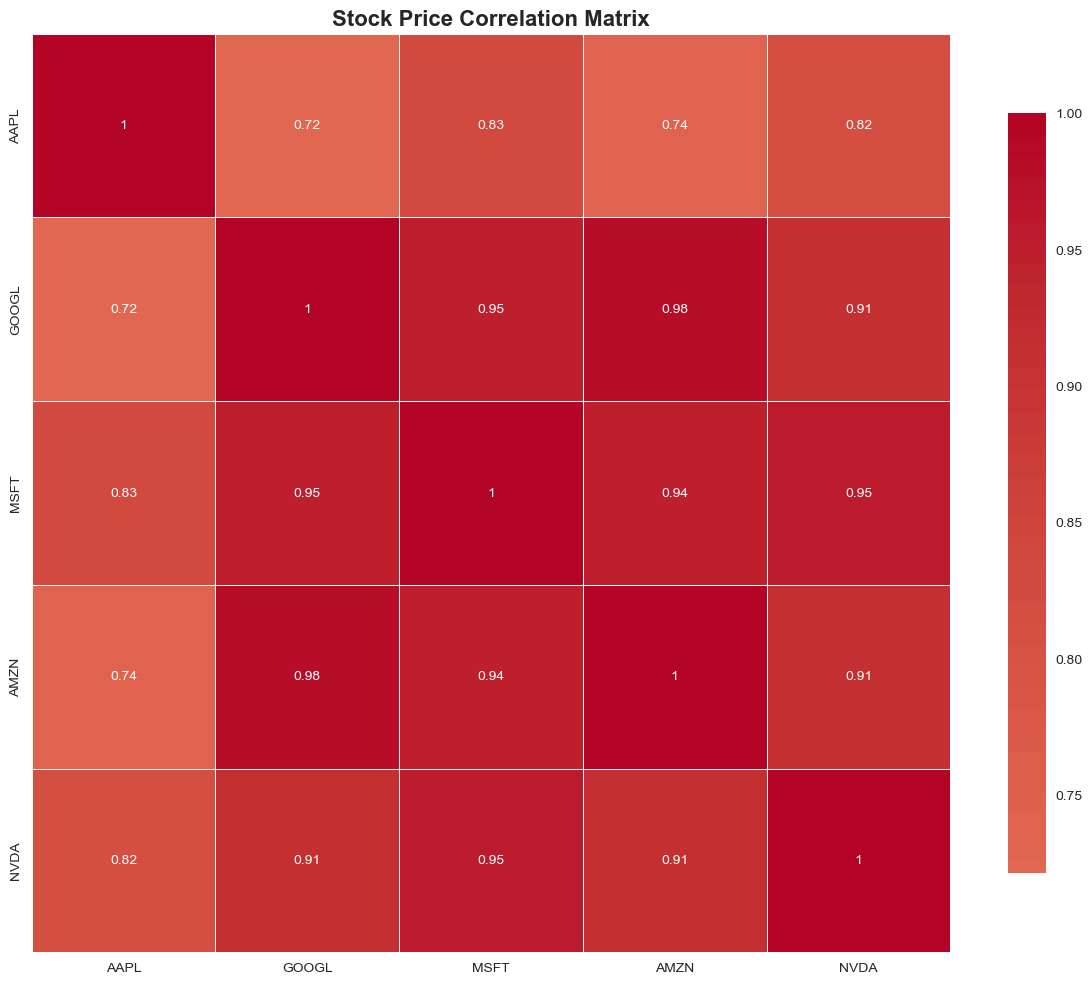


📊 COMPREHENSIVE INVESTMENT INSIGHTS REPORT

🏆 TOP PERFORMERS:
------------------------------
📈 Best Return: NVDA
   • Annualized Return: 87.01%
   • Sharpe Ratio: 1.79
   • Max Drawdown: -25.27%

📉 Worst Return: GOOGL
   • Annualized Return: 17.28%
   • Volatility: 21.94%

⚡ RISK ANALYSIS:
-------------------------
🎢 Most Volatile: NVDA (37.68%)
🔒 Least Volatile: MSFT (21.74%)

⚖️ RISK-ADJUSTED PERFORMANCE:
----------------------------------------
🏆 Best Sharpe Ratio: NVDA (1.79)

💡 INVESTMENT RECOMMENDATIONS:
----------------------------------------
🎯 Conservative Investors: MSFT (lowest risk)
🚀 Growth Investors: NVDA (highest returns)
⚖️ Balanced Investors: NVDA (best risk-adjusted returns)

🔄 DIVERSIFICATION INSIGHTS:
-----------------------------------
✅ Best Diversification Pair: AAPL & GOOGL (correlation: 0.721)
⚠️ Most Correlated Pair: GOOGL & AMZN (correlation: 0.978)

📊 MARKET SENTIMENT:
-------------------------
Overall Trend: 📈 Bullish
Average Return: 35.89%

⚠️ IMPORTANT D

In [42]:
class StockAnalyzer:
    """
    Advanced Stock Price Time Series Analysis Class
    """
    
    def __init__(self, file_path):
        """Initialize the analyzer with data path"""
        self.file_path = file_path
        self.df = None
        self.df_cleaned = None
        self.analysis_results = {}
        self.correlation_matrix = None
        
        # Set style for better plots
        plt.style.use('seaborn-v0_8')
        sns.set_palette("husl")
        
    def load_and_clean_data(self):
        """Load and clean the stock data"""
        print("=== LOADING AND CLEANING DATA ===")
        print("=" * 50)
        
        # Load dataset
        self.df = pd.read_csv(self.file_path)
        
        print(f"Dataset shape: {self.df.shape}")
        print(f"Columns: {list(self.df.columns)}")
        print(f"Date range: {self.df['date'].min()} to {self.df['date'].max()}")
        print(f"Number of unique stocks: {self.df['symbol'].nunique()}")
        
        # Convert date column to datetime
        self.df['date'] = pd.to_datetime(self.df['date'])
        
        # Clean the data
        self.df_cleaned = self.df.dropna(subset=['open', 'high', 'low', 'close']).copy()
        
        # Sort by symbol and date for proper time series analysis
        self.df_cleaned = self.df_cleaned.sort_values(['symbol', 'date']).reset_index(drop=True)
        
        print(f"\nRows after cleaning: {len(self.df_cleaned)}")
        print(f"Missing values after cleaning:\n{self.df_cleaned.isnull().sum()}")
        
        return self.df_cleaned
    
    def get_top_stocks(self, n=10):
        """Get top stocks by trading volume"""
        top_stocks = self.df_cleaned.groupby('symbol')['volume'].mean().sort_values(ascending=False).head(n)
        print(f"\nTop {n} stocks by average volume:")
        print(top_stocks)
        return top_stocks.index.tolist()
    
    def select_analysis_stocks(self, preferred_stocks=None, n=5):
        """Select stocks for detailed analysis"""
        if preferred_stocks is None:
            preferred_stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'META', 'NVDA']
        
        # Get available stocks from preferred list
        available_stocks = [stock for stock in preferred_stocks if stock in self.df_cleaned['symbol'].unique()]
        
        # If not enough preferred stocks, fill with top volume stocks
        if len(available_stocks) < n:
            top_stocks = self.get_top_stocks(n*2)  # Get more than needed
            for stock in top_stocks:
                if stock not in available_stocks and len(available_stocks) < n:
                    available_stocks.append(stock)
        
        self.selected_stocks = available_stocks[:n]
        print(f"\nSelected stocks for analysis: {self.selected_stocks}")
        return self.selected_stocks
    
    def calculate_technical_indicators(self, stock_data):
        """Calculate technical indicators for a stock"""
        stock_data = stock_data.copy()
        
        # Daily returns
        stock_data['daily_return'] = stock_data['close'].pct_change()
        
        # Cumulative returns
        stock_data['cum_return'] = (1 + stock_data['daily_return']).cumprod() - 1
        
        # Moving averages
        stock_data['MA_7'] = stock_data['close'].rolling(window=7).mean()
        stock_data['MA_30'] = stock_data['close'].rolling(window=30).mean()
        stock_data['MA_90'] = stock_data['close'].rolling(window=90).mean()
        
        # Volatility (rolling standard deviation)
        stock_data['volatility_30d'] = stock_data['daily_return'].rolling(window=30).std()
        
        # Bollinger Bands
        stock_data['BB_upper'] = stock_data['MA_30'] + (stock_data['close'].rolling(window=30).std() * 2)
        stock_data['BB_lower'] = stock_data['MA_30'] - (stock_data['close'].rolling(window=30).std() * 2)
        
        # RSI (Relative Strength Index)
        delta = stock_data['close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        stock_data['RSI'] = 100 - (100 / (1 + rs))
        
        # Price range
        stock_data['price_range'] = stock_data['high'] - stock_data['low']
        
        return stock_data
    
    def analyze_stock_performance(self):
        """Analyze performance metrics for selected stocks"""
        print("\n=== STOCK PERFORMANCE ANALYSIS ===")
        print("=" * 50)
        
        self.analysis_results = {}
        
        for stock in self.selected_stocks:
            stock_data = self.df_cleaned[self.df_cleaned['symbol'] == stock].sort_values('date').copy()
            
            if len(stock_data) < 30:  # Skip if insufficient data
                continue
                
            # Calculate technical indicators
            stock_data = self.calculate_technical_indicators(stock_data)
            
            # Calculate performance metrics
            returns = stock_data['daily_return'].dropna()
            
            # Maximum drawdown
            cum_returns = (1 + returns).cumprod()
            rolling_max = cum_returns.expanding().max()
            drawdown = (cum_returns - rolling_max) / rolling_max
            max_drawdown = drawdown.min()
            
            # Sharpe ratio (annualized)
            risk_free_rate = 0.02 / 252  # Daily risk-free rate
            excess_returns = returns - risk_free_rate
            sharpe_ratio = excess_returns.mean() / returns.std() * np.sqrt(252)
            
            # Sortino ratio (downside risk)
            downside_returns = returns[returns < 0]
            sortino_ratio = excess_returns.mean() / downside_returns.std() * np.sqrt(252) if len(downside_returns) > 0 else np.nan
            
            # VaR (Value at Risk) - 5% level
            var_5 = np.percentile(returns, 5)
            
            # Store results
            self.analysis_results[stock] = {
                'total_return': ((stock_data['close'].iloc[-1] / stock_data['close'].iloc[0]) - 1) * 100,
                'annualized_return': (((stock_data['close'].iloc[-1] / stock_data['close'].iloc[0]) ** (252 / len(stock_data))) - 1) * 100,
                'volatility': returns.std() * np.sqrt(252) * 100,  # Annualized volatility
                'sharpe_ratio': sharpe_ratio,
                'sortino_ratio': sortino_ratio,
                'max_drawdown': max_drawdown * 100,
                'var_5': var_5 * 100,
                'max_price': stock_data['close'].max(),
                'min_price': stock_data['close'].min(),
                'avg_volume': stock_data['volume'].mean(),
                'current_price': stock_data['close'].iloc[-1],
                'data_points': len(stock_data)
            }
        
        # Create results DataFrame
        results_df = pd.DataFrame(self.analysis_results).T
        print("\n📊 PERFORMANCE METRICS SUMMARY:")
        print(results_df.round(4))
        
        return results_df
    
    def plot_price_charts(self):
        """Create comprehensive price charts"""
        print("\n=== CREATING PRICE CHARTS ===")
        
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        axes = axes.flatten()
        
        for i, stock in enumerate(self.selected_stocks):
            if i >= 6:  # Limit to 6 charts
                break
                
            stock_data = self.df_cleaned[self.df_cleaned['symbol'] == stock].sort_values('date')
            stock_data = self.calculate_technical_indicators(stock_data)
            
            # Plot price and moving averages
            axes[i].plot(stock_data['date'], stock_data['close'], label='Close', linewidth=2, alpha=0.8)
            axes[i].plot(stock_data['date'], stock_data['MA_30'], label='30-day MA', linewidth=1.5, alpha=0.7)
            axes[i].plot(stock_data['date'], stock_data['MA_90'], label='90-day MA', linewidth=1.5, alpha=0.7)
            
            axes[i].set_title(f'{stock} - Price and Moving Averages', fontsize=14, fontweight='bold')
            axes[i].set_xlabel('Date')
            axes[i].set_ylabel('Price ($)')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
            axes[i].tick_params(axis='x', rotation=45)
        
        # Remove empty subplots
        for i in range(len(self.selected_stocks), 6):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
    
    def plot_returns_analysis(self):
        """Plot returns and volatility analysis"""
        print("\n=== RETURNS AND VOLATILITY ANALYSIS ===")
        
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        
        # Cumulative returns
        for stock in self.selected_stocks:
            stock_data = self.df_cleaned[self.df_cleaned['symbol'] == stock].sort_values('date')
            stock_data = self.calculate_technical_indicators(stock_data)
            axes[0, 0].plot(stock_data['date'], stock_data['cum_return'] * 100, label=stock, linewidth=2)
        
        axes[0, 0].set_title('Cumulative Returns (%)', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Date')
        axes[0, 0].set_ylabel('Cumulative Return (%)')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Rolling volatility
        for stock in self.selected_stocks:
            stock_data = self.df_cleaned[self.df_cleaned['symbol'] == stock].sort_values('date')
            stock_data = self.calculate_technical_indicators(stock_data)
            axes[0, 1].plot(stock_data['date'], stock_data['volatility_30d'] * 100, label=stock, alpha=0.7)
        
        axes[0, 1].set_title('30-Day Rolling Volatility (%)', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Date')
        axes[0, 1].set_ylabel('Volatility (%)')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Risk-Return scatter plot
        returns = [self.analysis_results[stock]['annualized_return'] for stock in self.selected_stocks if stock in self.analysis_results]
        volatilities = [self.analysis_results[stock]['volatility'] for stock in self.selected_stocks if stock in self.analysis_results]
        
        scatter = axes[1, 0].scatter(volatilities, returns, s=100, alpha=0.7, c=range(len(returns)), cmap='viridis')
        axes[1, 0].set_xlabel('Volatility (Risk) %')
        axes[1, 0].set_ylabel('Annualized Return %')
        axes[1, 0].set_title('Risk vs Return Analysis', fontsize=14, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Add stock labels
        for i, stock in enumerate([s for s in self.selected_stocks if s in self.analysis_results]):
            axes[1, 0].annotate(stock, (volatilities[i], returns[i]), 
                               xytext=(5, 5), textcoords='offset points')
        
        # Sharpe ratio comparison
        sharpe_ratios = [self.analysis_results[stock]['sharpe_ratio'] for stock in self.selected_stocks if stock in self.analysis_results]
        stock_names = [stock for stock in self.selected_stocks if stock in self.analysis_results]
        
        bars = axes[1, 1].bar(stock_names, sharpe_ratios, color='skyblue', alpha=0.7)
        axes[1, 1].set_title('Sharpe Ratio Comparison', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Stock')
        axes[1, 1].set_ylabel('Sharpe Ratio')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, ratio in zip(bars, sharpe_ratios):
            height = bar.get_height()
            axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{ratio:.2f}', ha='center', va='bottom')
        
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def analyze_correlations(self):
        """Analyze correlations between stocks"""
        print("\n=== CORRELATION ANALYSIS ===")
        
        # Create price data matrix
        price_data = {}
        for stock in self.selected_stocks:
            stock_data = self.df_cleaned[self.df_cleaned['symbol'] == stock].sort_values('date')
            stock_data = stock_data.set_index('date')
            price_data[stock] = stock_data['close']
        
        # Combine all stock data
        combined_data = pd.DataFrame(price_data)
        combined_data = combined_data.dropna()
        
        # Calculate correlation matrix
        self.correlation_matrix = combined_data.corr()
        
        # Plot correlation heatmap
        fig, ax = plt.subplots(figsize=(12, 10))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5, cbar_kws={"shrink": .8})
        ax.set_title('Stock Price Correlation Matrix', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        return self.correlation_matrix
    
    def generate_investment_report(self):
        """Generate comprehensive investment insights report"""
        print("\n" + "="*80)
        print("📊 COMPREHENSIVE INVESTMENT INSIGHTS REPORT")
        print("="*80)
        
        if not self.analysis_results:
            print("❌ No analysis results available. Please run analyze_stock_performance() first.")
            return
        
        # Top performers
        best_return = max(self.analysis_results.keys(), key=lambda x: self.analysis_results[x]['annualized_return'])
        worst_return = min(self.analysis_results.keys(), key=lambda x: self.analysis_results[x]['annualized_return'])
        
        print(f"\n🏆 TOP PERFORMERS:")
        print("-" * 30)
        print(f"📈 Best Return: {best_return}")
        print(f"   • Annualized Return: {self.analysis_results[best_return]['annualized_return']:.2f}%")
        print(f"   • Sharpe Ratio: {self.analysis_results[best_return]['sharpe_ratio']:.2f}")
        print(f"   • Max Drawdown: {self.analysis_results[best_return]['max_drawdown']:.2f}%")
        
        print(f"\n📉 Worst Return: {worst_return}")
        print(f"   • Annualized Return: {self.analysis_results[worst_return]['annualized_return']:.2f}%")
        print(f"   • Volatility: {self.analysis_results[worst_return]['volatility']:.2f}%")
        
        # Risk analysis
        most_volatile = max(self.analysis_results.keys(), key=lambda x: self.analysis_results[x]['volatility'])
        least_volatile = min(self.analysis_results.keys(), key=lambda x: self.analysis_results[x]['volatility'])
        
        print(f"\n⚡ RISK ANALYSIS:")
        print("-" * 25)
        print(f"🎢 Most Volatile: {most_volatile} ({self.analysis_results[most_volatile]['volatility']:.2f}%)")
        print(f"🔒 Least Volatile: {least_volatile} ({self.analysis_results[least_volatile]['volatility']:.2f}%)")
        
        # Risk-adjusted performance
        best_sharpe = max(self.analysis_results.keys(), key=lambda x: self.analysis_results[x]['sharpe_ratio'])
        
        print(f"\n⚖️ RISK-ADJUSTED PERFORMANCE:")
        print("-" * 40)
        print(f"🏆 Best Sharpe Ratio: {best_sharpe} ({self.analysis_results[best_sharpe]['sharpe_ratio']:.2f})")
        
        # Investment recommendations
        print(f"\n💡 INVESTMENT RECOMMENDATIONS:")
        print("-" * 40)
        print(f"🎯 Conservative Investors: {least_volatile} (lowest risk)")
        print(f"🚀 Growth Investors: {best_return} (highest returns)")
        print(f"⚖️ Balanced Investors: {best_sharpe} (best risk-adjusted returns)")
        
        # Diversification analysis
        if self.correlation_matrix is not None:
            print(f"\n🔄 DIVERSIFICATION INSIGHTS:")
            print("-" * 35)
            
            # Find least correlated pairs
            correlations = []
            for i in range(len(self.selected_stocks)):
                for j in range(i+1, len(self.selected_stocks)):
                    stock1, stock2 = self.selected_stocks[i], self.selected_stocks[j]
                    if stock1 in self.correlation_matrix.columns and stock2 in self.correlation_matrix.columns:
                        corr = self.correlation_matrix.loc[stock1, stock2]
                        correlations.append((stock1, stock2, corr))
            
            if correlations:
                correlations.sort(key=lambda x: x[2])
                least_corr = correlations[0]
                most_corr = correlations[-1]
                
                print(f"✅ Best Diversification Pair: {least_corr[0]} & {least_corr[1]} (correlation: {least_corr[2]:.3f})")
                print(f"⚠️ Most Correlated Pair: {most_corr[0]} & {most_corr[1]} (correlation: {most_corr[2]:.3f})")
        
        # Market sentiment
        avg_return = np.mean([self.analysis_results[stock]['annualized_return'] for stock in self.analysis_results])
        if avg_return > 10:
            sentiment = "📈 Bullish"
        elif avg_return < -5:
            sentiment = "📉 Bearish"
        else:
            sentiment = "➡️ Neutral"
        
        print(f"\n📊 MARKET SENTIMENT:")
        print("-" * 25)
        print(f"Overall Trend: {sentiment}")
        print(f"Average Return: {avg_return:.2f}%")
        
        # Risk warnings
        print(f"\n⚠️ IMPORTANT DISCLAIMERS:")
        print("-" * 30)
        print("• Past performance does not guarantee future results")
        print("• All investments carry risk of loss")
        print("• Diversification does not guarantee profit or protect against loss")
        print("• Consider your risk tolerance and investment objectives")
        print("• Consult with a financial advisor before making investment decisions")
        
        print("\n" + "="*80)
        print("📈 ANALYSIS COMPLETE - INVEST WISELY! 📈")
        print("="*80)
    
    def run_complete_analysis(self):
        """Run the complete analysis pipeline"""
        print("🚀 STARTING COMPREHENSIVE STOCK ANALYSIS")
        print("="*60)
        
        # Load and clean data
        self.load_and_clean_data()
        
        # Select stocks for analysis
        self.select_analysis_stocks()
        
        # Analyze performance
        results_df = self.analyze_stock_performance()
        
        # Create visualizations
        self.plot_price_charts()
        self.plot_returns_analysis()
        
        # Analyze correlations
        self.analyze_correlations()
        
        # Generate final report
        self.generate_investment_report()
        
        # Save results
        results_df.to_csv('stock_analysis_results.csv', index=True)
        print(f"\n✅ Results saved to 'stock_analysis_results.csv'")
        
        return results_df

# Usage Example
if __name__ == "__main__":
    # Initialize analyzer with your data path
    file_path = r"C:\Users\engah\OneDrive\Desktop\Codveda\Data Set For Task\2) Stock Prices Data Set.csv"
    
    analyzer = StockAnalyzer(file_path)
    
    # Run complete analysis
    results = analyzer.run_complete_analysis()
    
    # You can also run individual components:
    # analyzer.load_and_clean_data()
    # analyzer.select_analysis_stocks(['AAPL', 'GOOGL', 'MSFT'])
    # analyzer.analyze_stock_performance()
    # analyzer.plot_price_charts()
    # analyzer.generate_investment_report()